# Concentrations moyennes annuelles de polluants en Centre-Val-de-Loire

## Source des informations

La loi sur l’air et l’utilisation rationnelle de l’énergie du 30 décembre 1996 reconnaît à chacun le droit de respirer un air qui ne nuise pas à sa santé. Cette loi prévoit une surveillance de la qualité de l'air sur l'ensemble du territoire depuis l’an 2000.

L'Etat confie cette surveillance à des organismes agréés par le Ministère chargé de l'Environnement.  

Lig'Air est une association régionale du type loi de 1901 créée le 27 Novembre 1996 pour assurer la surveillance de la qualité de l’air en région Centre-Val de Loire.  

## Intentions

Nous nous sommes intéressés aux problématiques liées aux maladies respiratoires. La question principale : quelle serait la meilleure ville de la région Centre-Val-de-Loire où s'installer pour limiter au maximum l'impact sur la santé de personnes souffrant d'asthme ?

## Quelques définitions

NO2 : Le dioxyde d'azote fait partie d'un groupe de polluants atmosphériques gazeux produits par la circulation routière et d'autres processus de combustion de combustibles fossiles

SO2 : Le dioxyde de soufre (SO2), un gaz toxique incolore et malodorant, émis par la combustion de combustibles fossiles - charbon, pétrole et diesel - ou d'autres matériaux contenant du sulfu

O3 : L'ozone se forme lorsque les polluants émis par les voitures, les centrales électriques, les chaudières industrielles, les raffineries, les usines chimiques et d'autres sources réagissent chimiquement en présence de la lumière du soleil.

PM10/PM25 : Fait référence à des particules atmosphériques (PM) qui ont un diamètre inférieur à 1 / 2,5 micromètres, soit environ 3% du diamètre d'un cheveu humain.

# Présentation du set de data

In [1]:
import pandas as pd

url = "https://opendata.arcgis.com/datasets/6f64bbd4f94c425791c2ec7eee33bb71_0.csv"
df = pd.read_csv(url)

df.head(5)

,X,Y,date_ech,valeur,qualif,source,type_zone,code_zone,lib_zone,val_no2,val_so2,val_o3,val_pm10,val_pm25,couleur,x_wgs84,y_wgs84,ObjectId
0,1.903984,47.903174,2019/01/02 00:00:00+00,3,Bon,Lig'Air,EPCI,244500468,ORLEANS,1,1,3,3,0,#0AD857,1.903984,47.903174,1
1,0.682860,47.394438,2018/10/14 00:00:00+00,4,Bon,Lig'Air,EPCI,243700754,TOURS,2,1,4,2,0,#A2F743,0.682860,47.394438,2
2,2.396232,47.079706,2019/01/02 00:00:00+00,3,Bon,Lig'Air,EPCI,241800507,BOURGES,2,1,3,3,0,#0AD857,2.396232,47.079706,3
3,1.490599,48.445544,2018/10/20 00:00:00+00,5,Moyen,Lig'Air,EPCI,200033181,CHARTRES,2,1,3,5,0,#FFFF00,1.490599,48.445544,4
4,1.696049,46.810434,2018/10/20 00:00:00+00,5,Moyen,Lig'Air,EPCI,243600327,CHATEAUROUX,1,1,4,5,0,#FFFF00,1.696049,46.810434,5


## Composition du dataframe

In [2]:
print(df.shape)
print(df.size)

(8144, 18)
146592


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8144 entries, 0 to 8143
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          8144 non-null   float64
 1   Y          8144 non-null   float64
 2   date_ech   8144 non-null   object 
 3   valeur     8144 non-null   int64  
 4   qualif     8144 non-null   object 
 5   source     8144 non-null   object 
 6   type_zone  8144 non-null   object 
 7   code_zone  8144 non-null   int64  
 8   lib_zone   8144 non-null   object 
 9   val_no2    8144 non-null   int64  
 10  val_so2    8144 non-null   int64  
 11  val_o3     8144 non-null   int64  
 12  val_pm10   8144 non-null   int64  
 13  val_pm25   8144 non-null   int64  
 14  couleur    8144 non-null   object 
 15  x_wgs84    8144 non-null   float64
 16  y_wgs84    8144 non-null   float64
 17  ObjectId   8144 non-null   int64  
dtypes: float64(4), int64(8), object(6)
memory usage: 1.1+ MB


In [4]:
df.isna().sum()

X            0
Y            0
date_ech     0
valeur       0
qualif       0
source       0
type_zone    0
code_zone    0
lib_zone     0
val_no2      0
val_so2      0
val_o3       0
val_pm10     0
val_pm25     0
couleur      0
x_wgs84      0
y_wgs84      0
ObjectId     0
dtype: int64

# Nettoyage des données

Après analyse du contenu des colonnes, nous avons décidé de supprimer trois colonnes qui selon nous nous semblaient redondantes ou inutiles.
- La colonne d'index 5 --> Elle notait la source des informations de la ligne. Hors, toutes les informations viennent de Lig'Air
- La colonne d'index 6 --> Type de structure administrative, toutes les données similaires
- La colonne d'index 17 --> Elle sert à donner un identifiant à chaque ligne. Nous ne nous en servirons pas ici

In [5]:
df.drop(df.columns[[5, 6, 14, 15, 16, 17]], axis='columns')

#Supprimer les colonnes lat/long en trop (les comparer d'abord) + virer les couleurs

,X,Y,date_ech,valeur,qualif,code_zone,lib_zone,val_no2,val_so2,val_o3,val_pm10,val_pm25
0,1.903984,47.903174,2019/01/02 00:00:00+00,3,Bon,244500468,ORLEANS,1,1,3,3,0
1,0.682860,47.394438,2018/10/14 00:00:00+00,4,Bon,243700754,TOURS,2,1,4,2,0
2,2.396232,47.079706,2019/01/02 00:00:00+00,3,Bon,241800507,BOURGES,2,1,3,3,0
3,1.490599,48.445544,2018/10/20 00:00:00+00,5,Moyen,200033181,CHARTRES,2,1,3,5,0
4,1.696049,46.810434,2018/10/20 00:00:00+00,5,Moyen,243600327,CHATEAUROUX,1,1,4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8139,1.490599,48.445544,2018/09/04 00:00:00+00,3,Bon,200033181,CHARTRES,1,1,3,3,0
8140,1.696049,46.810434,2018/09/04 00:00:00+00,5,Moyen,243600327,CHATEAUROUX,1,1,5,3,0
8141,1.322670,47.590341,2018/09/04 00:00:00+00,5,Moyen,200030385,BLOIS,1,1,5,3,0
8142,1.359952,48.748753,2018/09/04 00:00:00+00,3,Bon,200040277,DREUX,1,1,3,3,0


# Analyses globales

Analyse des valeurs des cinq types de polluants du dataframe sous forme de minimum/maximum/moyenne

In [6]:
listPolluants = ['val_no2','val_so2','val_pm10','val_pm25','val_o3']

data=df.groupby('lib_zone')[listPolluants].agg(['min', 'max', 'mean'])

data = data.reset_index()

data

lib_zone val_no2               val_so2               val_pm10      \
                   min max      mean     min max      mean      min max   
0        BLOIS       0   4  1.235756       0   1  0.997053        0   8   
1      BOURGES       0   5  1.302554       0   1  0.997053        0   7   
2     CHARTRES       0   4  0.463654       0   1  0.997053        0   8   
3  CHATEAUROUX       0   4  1.234774       0   1  0.997053        0   7   
4        DREUX       0   4  1.289784       0   1  0.997053        0   8   
5    MONTARGIS       0   4  1.284872       0   1  0.997053        0   8   
6      ORLEANS       0   4  1.218075       0   1  0.997053        0   8   
7        TOURS       0   5  1.466601       0   1  0.997053        0   8   

            val_pm25          val_o3                
       mean      min max mean    min max      mean  
0  2.530452        0   0    0      0   7  3.719057  
1  2.504912        0   0    0      0   8  3.606090  
2  2.661100        0   0    0      0   8  3.643418  
3  2.578585        0   0    0      0   8  3.681729  
4  2.535363        0   0    0      0   9  3.608055  
5  2.186640        0   0    0      0   8  3.806483  
6  2.263261        0   0    0      0   7  3.719057  
7  2.786837        0   0    0      0   7  3.676817

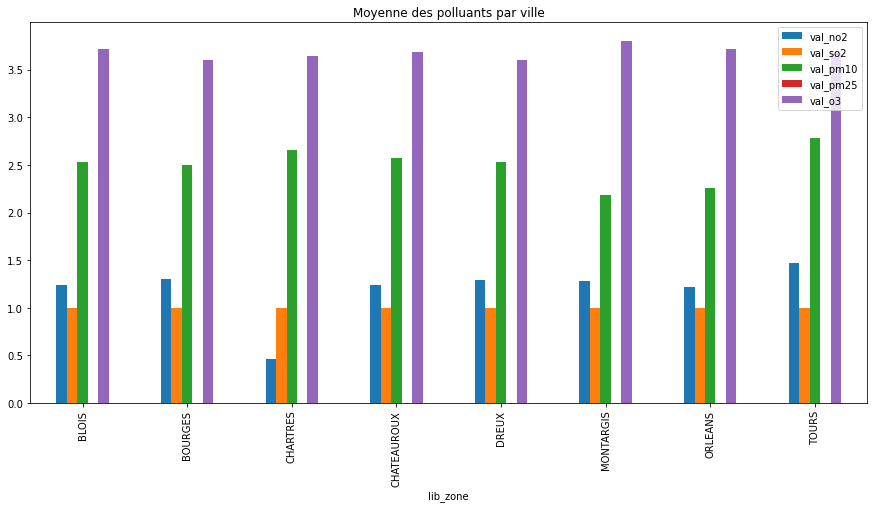

In [7]:
listPolluants = ['val_no2','val_so2','val_pm10','val_pm25','val_o3']

dataMean=df.groupby('lib_zone')[listPolluants].mean()

dataMean = dataMean.reset_index()

dataMean.plot(kind = 'bar', x="lib_zone", figsize=(15,7), title = 'Moyenne des polluants par ville');

## Quelques variations

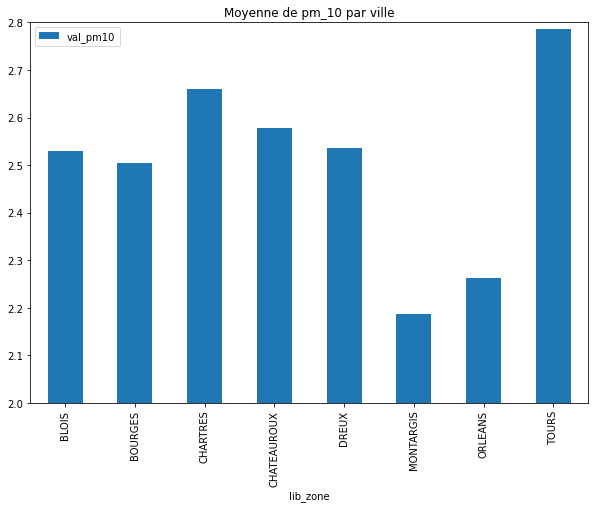

In [8]:
dataPm10 = pd.DataFrame(dataMean,columns=['lib_zone','val_pm10'])
dataPm10
dataPm10.plot(kind = 'bar', x="lib_zone", figsize=(10,7), title = 'Moyenne de pm_10 par ville', ylim=(2,2.8));

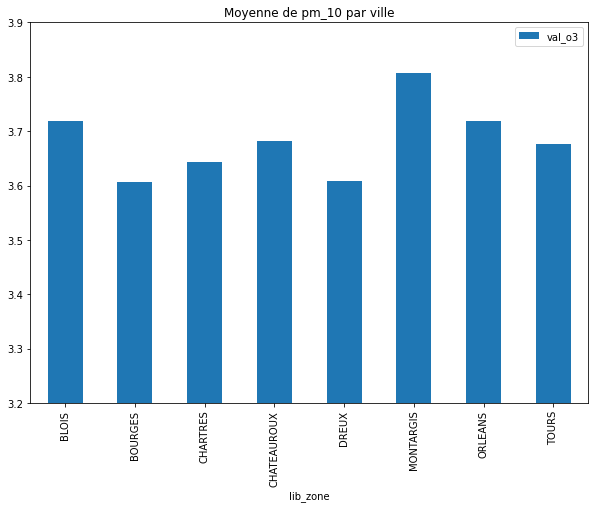

In [9]:
dataO3 = pd.DataFrame(dataMean,columns=['lib_zone','val_o3'])
dataO3
dataO3.plot(kind = 'bar', x="lib_zone", figsize=(10,7), title = 'Moyenne de pm_10 par ville', ylim=(3.2,3.9));

# Période étudiée

## Quel range de dates ?

In [10]:
df["date_ech"].min()

'2018/01/01 00:00:00+00'

In [11]:
df["date_ech"].max()

'2020/10/15 00:00:00+00'

In [12]:
import numpy as np

df['date_ech'] = pd.to_datetime(df['date_ech'])

df['Day'] = df['date_ech'].dt.day
df['Month'] = df['date_ech'].dt.month
df['Year'] = df['date_ech'].dt.year 

dateColumns = ['lib_zone','Day','Month',"Year","val_no2", "val_so2","val_o3","val_pm10","val_pm25","date_ech"]

df[dateColumns]

,lib_zone,Day,Month,Year,val_no2,val_so2,val_o3,val_pm10,val_pm25,date_ech
0,ORLEANS,2,1,2019,1,1,3,3,0,2019-01-02 00:00:00+00:00
1,TOURS,14,10,2018,2,1,4,2,0,2018-10-14 00:00:00+00:00
2,BOURGES,2,1,2019,2,1,3,3,0,2019-01-02 00:00:00+00:00
3,CHARTRES,20,10,2018,2,1,3,5,0,2018-10-20 00:00:00+00:00
4,CHATEAUROUX,20,10,2018,1,1,4,5,0,2018-10-20 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...
8139,CHARTRES,4,9,2018,1,1,3,3,0,2018-09-04 00:00:00+00:00
8140,CHATEAUROUX,4,9,2018,1,1,5,3,0,2018-09-04 00:00:00+00:00
8141,BLOIS,4,9,2018,1,1,5,3,0,2018-09-04 00:00:00+00:00
8142,DREUX,4,9,2018,1,1,3,3,0,2018-09-04 00:00:00+00:00


In [13]:
dataAgg=df.groupby(['lib_zone',"Year","Month"])[listPolluants].agg(['min', 'max', 'mean'])
dataAgg.head()

val_no2               val_so2          val_pm10      \
                        min max      mean     min max mean      min max   
lib_zone Year Month                                                       
BLOIS    2018 1           1   3  1.290323       1   1  1.0        1   4   
              2           1   4  1.607143       1   1  1.0        1   7   
              3           1   2  1.225806       1   1  1.0        1   5   
              4           1   3  1.466667       1   1  1.0        1   4   
              5           1   1  1.000000       1   1  1.0        1   5   

                              val_pm25          val_o3                
                         mean      min max mean    min max      mean  
lib_zone Year Month                                                   
BLOIS    2018 1      2.064516        0   0    0      2   4  3.096774  
              2      3.357143        0   0    0      2   4  2.928571  
              3      2.419355        0   0    0      3   4  3.774194  
              4      2.333333        0   0    0      3   5  4.133333  
              5      2.741935        0   0    0      4   6  4.612903

In [14]:
dataParVille=df.groupby(['lib_zone',"Year","Month"])[listPolluants].mean()
dataParVille = dataParVille.reset_index()
dataParVille

,lib_zone,Year,Month,val_no2,val_so2,val_pm10,val_pm25,val_o3
0,BLOIS,2018,1,1.290323,1.0,2.064516,0.0,3.096774
1,BLOIS,2018,2,1.607143,1.0,3.357143,0.0,2.928571
2,BLOIS,2018,3,1.225806,1.0,2.419355,0.0,3.774194
3,BLOIS,2018,4,1.466667,1.0,2.333333,0.0,4.133333
4,BLOIS,2018,5,1.000000,1.0,2.741935,0.0,4.612903
...,...,...,...,...,...,...,...,...
267,TOURS,2020,6,1.033333,1.0,2.200000,0.0,3.700000
268,TOURS,2020,7,1.096774,1.0,2.451613,0.0,3.741935
269,TOURS,2020,8,1.322581,1.0,2.419355,0.0,3.838710
270,TOURS,2020,9,1.633333,1.0,2.733333,0.0,3.800000


# Voyons plutôt des courbes

Text(0.5, 1.0, 'Moyenne globale de chaque polluant sur la région')

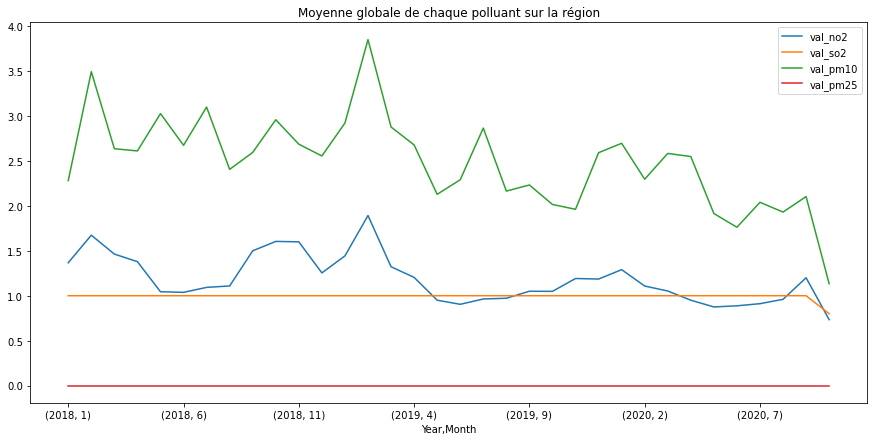

In [15]:
import matplotlib.pyplot as plt

#print(dataParVille)

dfpm = dataParVille.groupby(by=['Year', 'Month']).mean()

listPolluants = ['val_no2','val_so2','val_pm10','val_pm25']

dfpm.plot(y=listPolluants, figsize= (15,7))

plt.title("Moyenne globale de chaque polluant sur la région")


In [16]:
dataParVille['lib_zone'].unique()

array(['BLOIS', 'BOURGES', 'CHARTRES', 'CHATEAUROUX', 'DREUX',
       'MONTARGIS', 'ORLEANS', 'TOURS'], dtype=object)

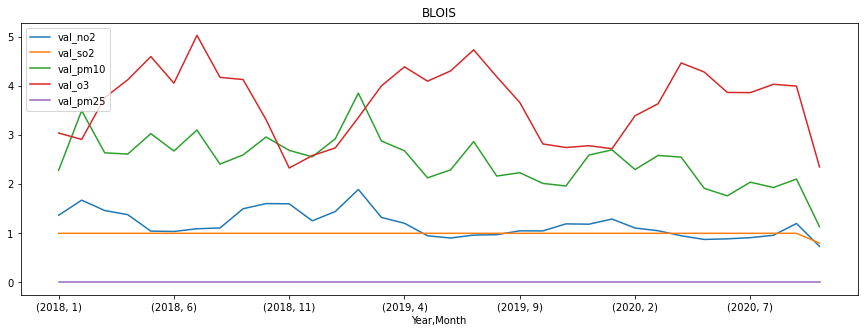

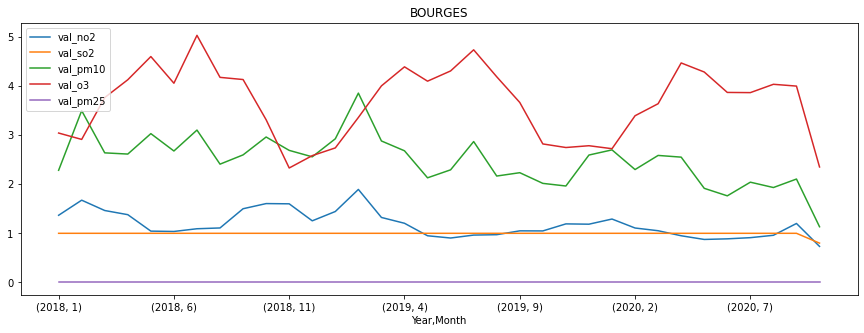

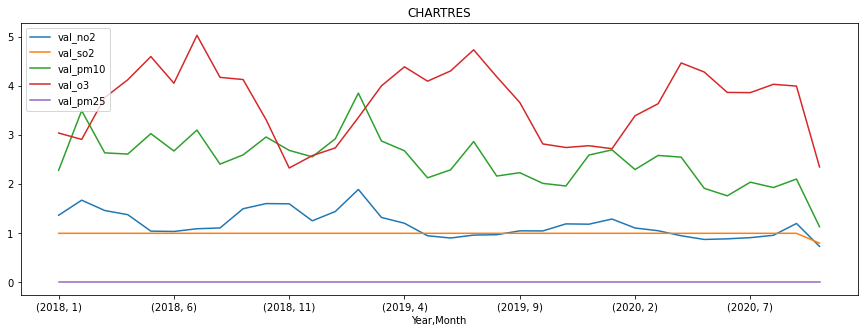

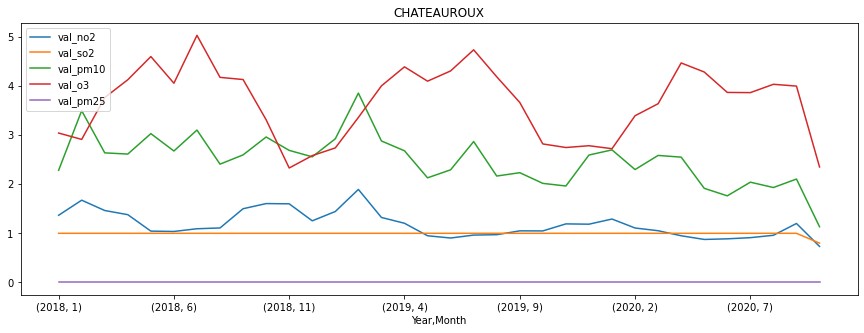

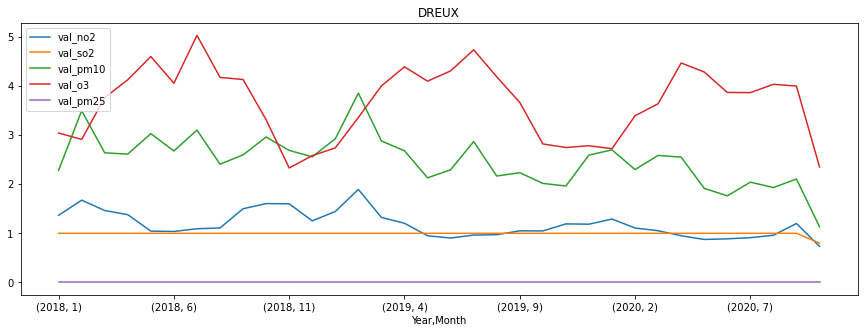

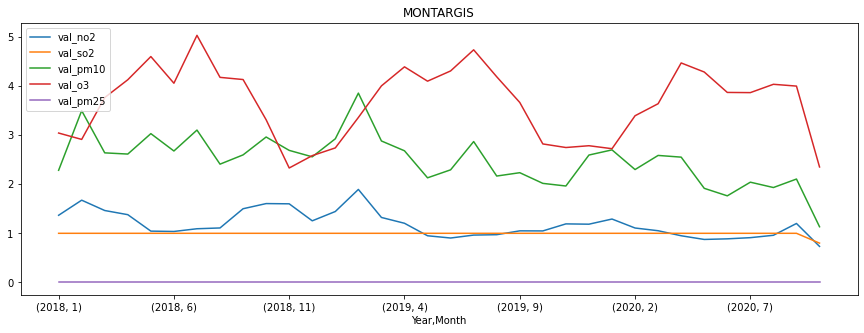

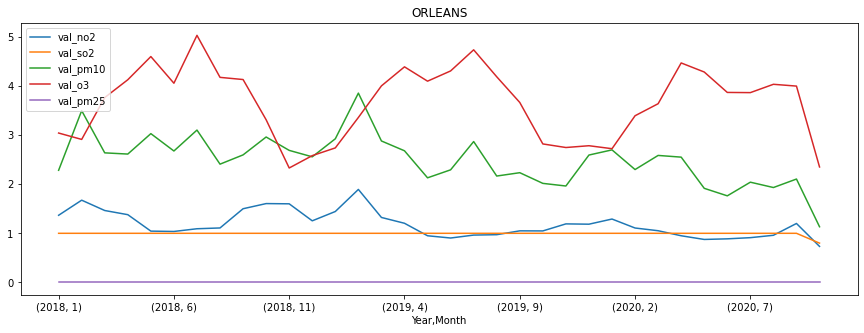

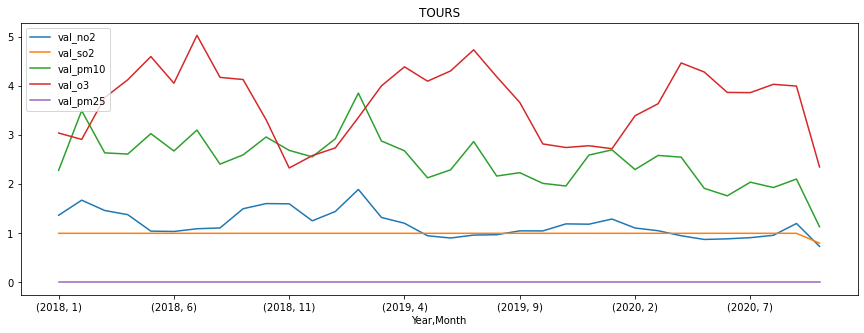

In [17]:
data2020 = dataParVille.copy()
for i in dataParVille['lib_zone'].unique() :
    dataParVille = dataParVille.iloc[np.where(dataParVille['lib_zone'] == i)[0], :]
    dfpm.plot(y=['val_no2','val_so2','val_pm10','val_o3','val_pm25'], figsize= (15,5))
    plt.title(i);

# Pour l'année 2020

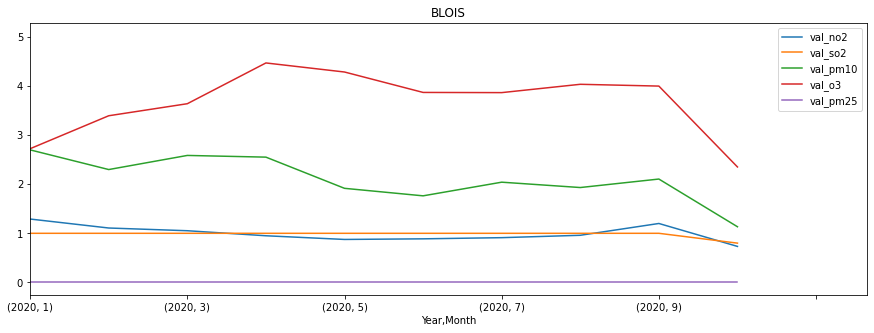

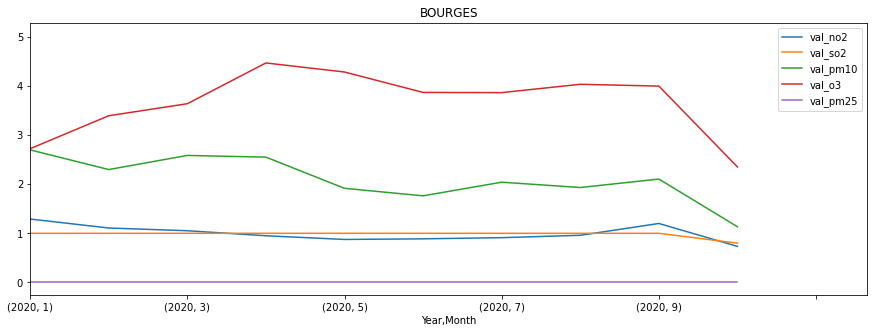

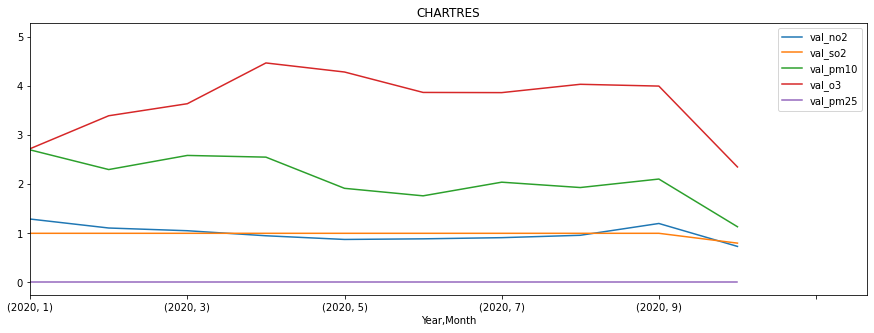

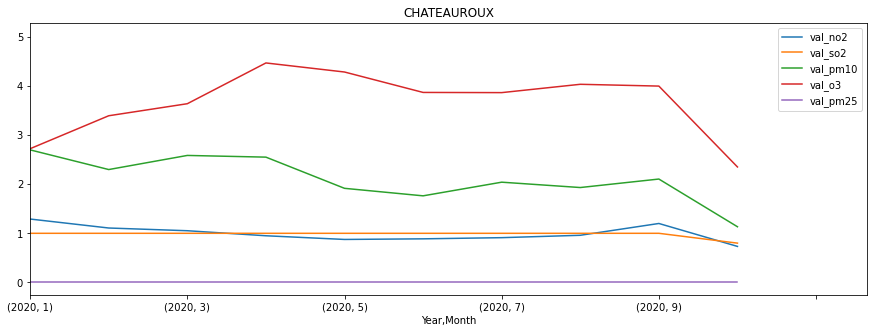

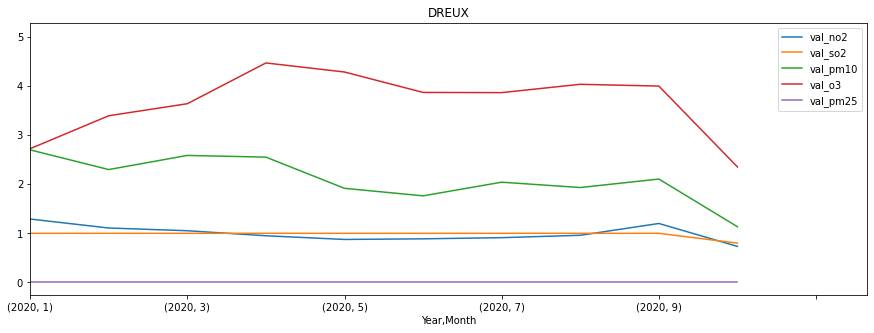

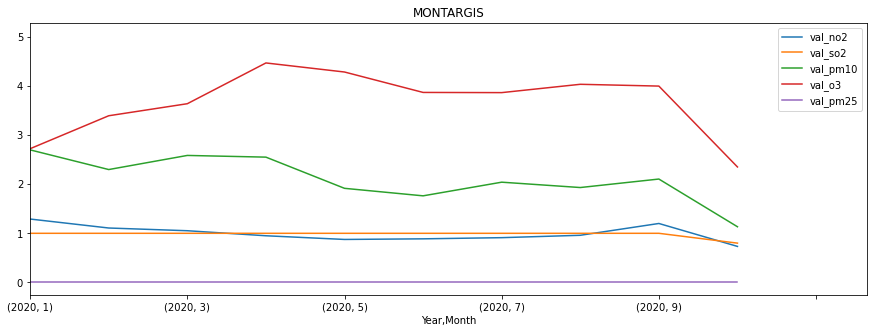

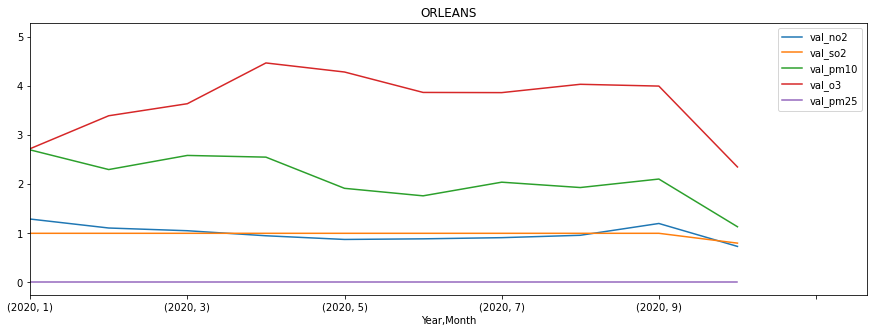

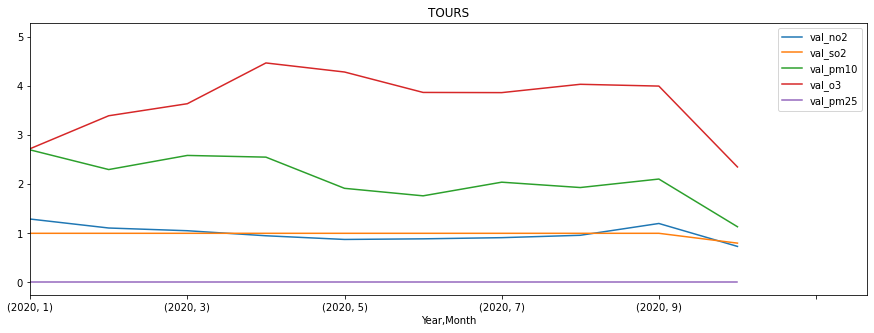

In [18]:
for i in data2020['lib_zone'].unique() :
    dataParVille = dataParVille.iloc[np.where(dataParVille['lib_zone'] == i)[0], :]
    dfpm.plot(y=['val_no2','val_so2','val_pm10','val_o3','val_pm25'], figsize= (15,5), xlim = 24)
    plt.title(i);